In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix

data_income = pd.read_csv('income.csv')
data = data_income.copy()

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 2.1+ MB
None


In [64]:
print(data.isnull().sum())

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64


In [65]:
print(data.describe())

                age   capitalgain   capitalloss  hoursperweek
count  31978.000000  31978.000000  31978.000000  31978.000000
mean      38.579023   1064.360623     86.739352     40.417850
std       13.662085   7298.596271    401.594301     12.345285
min       17.000000      0.000000      0.000000      1.000000
25%       28.000000      0.000000      0.000000     40.000000
50%       37.000000      0.000000      0.000000     40.000000
75%       48.000000      0.000000      0.000000     45.000000
max       90.000000  99999.000000   4356.000000     99.000000


In [66]:
print(data.describe(include='O'))

         JobType    EdType        maritalstatus       occupation relationship  \
count      31978     31978                31978            31978        31978   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22286     10368                14692             4038        12947   

          race gender   nativecountry                        SalStat  
count    31978  31978           31978                          31978  
unique       5      2              41                              2  
top      White   Male   United-States   less than or equal to 50,000  
freq     27430  21370           29170                          24283  


In [67]:
print(data['JobType'].value_counts())
print("\n",data['occupation'].value_counts())

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

  Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64


In [68]:
unique_ = np.unique(data['JobType'])
print(unique_,len(unique_))

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay'] 9


In [69]:
data2_ = pd.read_csv("income.csv",na_values=[" ?"])
print(data2_.isnull().sum())
print(set(data2_['JobType']))

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64
{nan, ' State-gov', ' Federal-gov', ' Self-emp-inc', ' Never-worked', ' Private', ' Local-gov', ' Self-emp-not-inc', ' Without-pay'}


In [70]:
missing = data[data.isnull().any(axis=1)]
data2 = data.dropna(axis=0)
print(data2.isnull().sum())
print(np.unique(data2['JobType']))

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64
[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']


In [71]:
correlation = data2.corr()
print(correlation)

                   age  capitalgain  capitalloss  hoursperweek
age           1.000000     0.077490     0.057282      0.068299
capitalgain   0.077490     1.000000    -0.031499      0.079112
capitalloss   0.057282    -0.031499     1.000000      0.053106
hoursperweek  0.068299     0.079112     0.053106      1.000000


C:\Users\soura\AppData\Local\Temp\ipykernel_16704\3987542488.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data2.corr()


In [72]:
print(data2.columns)

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')


In [73]:
gender = pd.crosstab(index = data2['gender'],columns ='count',normalize=True)
print(gender)

col_0       count
gender           
 Female  0.331728
 Male    0.668272


In [74]:
sal_status = pd.crosstab(index =data2['gender'],columns = data2['SalStat'],normalize="index",margins=True)
print(sal_status)

SalStat   greater than 50,000   less than or equal to 50,000
gender                                                      
 Female              0.109540                       0.890460
 Male                0.305709                       0.694291
All                  0.240634                       0.759366


In [75]:
rel_st = pd.crosstab(index = data2['gender'],columns = data2['relationship'],normalize="index")
print(rel_st)

relationship   Husband   Not-in-family   Other-relative   Own-child  \
gender                                                                
 Female       0.000094        0.361048         0.039781    0.208710   
 Male         0.605803        0.202433         0.024801    0.130604   

relationship   Unmarried      Wife  
gender                              
 Female         0.245852  0.144514  
 Male           0.036313  0.000047  


In [76]:
race_st = pd.crosstab(index= data2['gender'],columns = data['race'],normalize="index",margins=True)
print(race_st)

race      Amer-Indian-Eskimo   Asian-Pac-Islander     Black     Other  \
gender                                                                  
 Female             0.011218             0.030543  0.143571  0.009615   
 Male               0.008985             0.029574  0.070426  0.007066   
All                 0.009725             0.029896  0.094690  0.007912   

race        White  
gender             
 Female  0.805053  
 Male    0.883949  
All      0.857777  


In [77]:
job_st = pd.crosstab(index = data2['gender'],columns = data2['JobType'],normalize="index",margins = True)
print(job_st)

JobType         ?   Federal-gov   Local-gov   Never-worked   Private  \
gender                                                                 
 Female  0.077677      0.029129    0.077677       0.000189  0.720400   
 Male    0.046093      0.029668    0.058166       0.000234  0.685260   
All      0.056570      0.029489    0.064638       0.000219  0.696917   

JobType   Self-emp-inc   Self-emp-not-inc   State-gov   Without-pay  
gender                                                               
 Female       0.011878           0.036953    0.045626      0.000471  
 Male         0.044361           0.098596    0.037202      0.000421  
All           0.033586           0.078147    0.039996      0.000438  


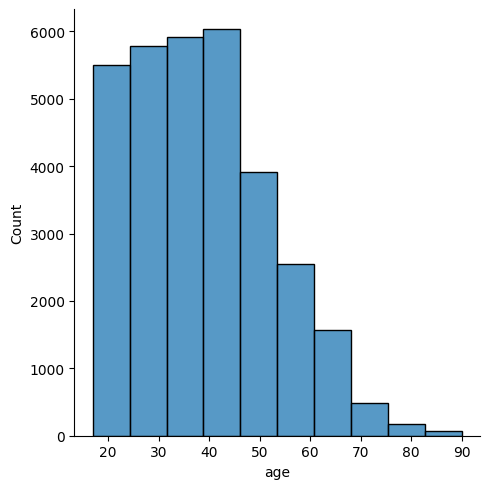

In [78]:
sns.displot(data['age'],bins=10,kde=False)

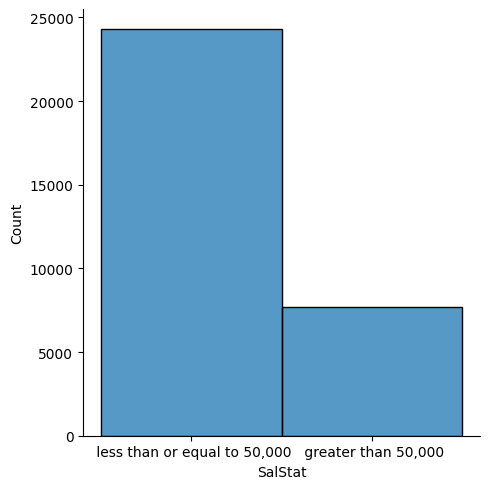

In [79]:
sns.displot(data['SalStat'],bins=10,kde=False)

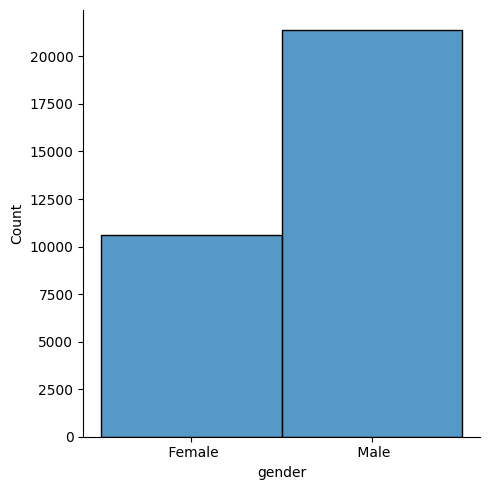

In [80]:
sns.displot(data['gender'],bins=10,kde=False)

SalStat
 greater than 50,000             44.0
 less than or equal to 50,000    34.0
Name: age, dtype: float64

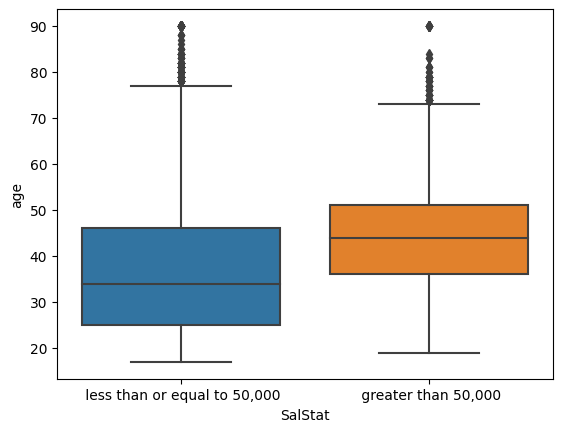

In [81]:
sns.boxplot(x='SalStat',y='age',data=data2)
data2.groupby('SalStat')['age'].median()

In [82]:
sal_st = pd.crosstab(index =data2['JobType'],columns = data2['SalStat'],margins= True , normalize= "index")
print(sal_st)

SalStat             greater than 50,000   less than or equal to 50,000
JobType                                                               
 ?                             0.103372                       0.896628
 Federal-gov                   0.387063                       0.612937
 Local-gov                     0.294630                       0.705370
 Never-worked                  0.000000                       1.000000
 Private                       0.218792                       0.781208
 Self-emp-inc                  0.558659                       0.441341
 Self-emp-not-inc              0.285714                       0.714286
 State-gov                     0.268960                       0.731040
 Without-pay                   0.000000                       1.000000
All                            0.240634                       0.759366


In [83]:
ed_st = pd.crosstab(index =data2['EdType'], columns = data2['SalStat'], normalize="index")
print(ed_st)

SalStat         greater than 50,000   less than or equal to 50,000
EdType                                                            
 10th                      0.066232                       0.933768
 11th                      0.050557                       0.949443
 12th                      0.074341                       0.925659
 1st-4th                   0.036810                       0.963190
 5th-6th                   0.044025                       0.955975
 7th-8th                   0.059011                       0.940989
 9th                       0.051383                       0.948617
 Assoc-acdm                0.248341                       0.751659
 Assoc-voc                 0.261347                       0.738653
 Bachelors                 0.416315                       0.583685
 Doctorate                 0.746154                       0.253846
 HS-grad                   0.160301                       0.839699
 Masters                   0.559140                       0.44

SalStat
 greater than 50,000             44.0
 less than or equal to 50,000    34.0
Name: age, dtype: float64

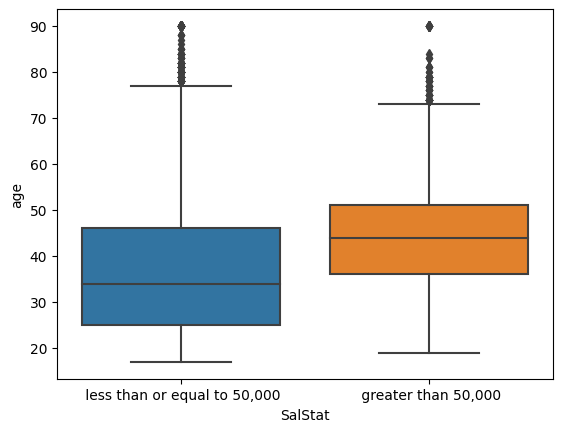

In [84]:
sns.boxplot(y='age',x='SalStat',data=data2)
data2.groupby('SalStat')['age'].median()

In [85]:
Occ_st = pd.crosstab(index = data2['occupation'],columns = data2['SalStat'],normalize="index")
print(Occ_st)

SalStat              greater than 50,000   less than or equal to 50,000
occupation                                                             
 ?                              0.102974                       0.897026
 Adm-clerical                   0.133835                       0.866165
 Armed-Forces                   0.111111                       0.888889
 Craft-repair                   0.225310                       0.774690
 Exec-managerial                0.485220                       0.514780
 Farming-fishing                0.116279                       0.883721
 Handlers-cleaners              0.061481                       0.938519
 Machine-op-inspct              0.124619                       0.875381
 Other-service                  0.041096                       0.958904
 Priv-house-serv                0.006993                       0.993007
 Prof-specialty                 0.448489                       0.551511
 Protective-serv                0.326087                       0

In [86]:
#hours vs sal
hr_st = pd.crosstab(index = data2['hoursperweek'],columns = data2['SalStat'],normalize="index")
print(hr_st)

SalStat        greater than 50,000   less than or equal to 50,000
hoursperweek                                                     
1                         0.111111                       0.888889
2                         0.250000                       0.750000
3                         0.025641                       0.974359
4                         0.056604                       0.943396
5                         0.120690                       0.879310
...                            ...                            ...
95                        0.500000                       0.500000
96                        0.200000                       0.800000
97                        0.500000                       0.500000
98                        0.272727                       0.727273
99                        0.301205                       0.698795

[94 rows x 2 columns]


part2

In [87]:
data2['SalStat'] = data2['SalStat'].map({" less than or equal to 50,000":0," greater than 50,000":1})
print(data2['SalStat'])
new_data = pd.get_dummies(data2, drop_first=True)

columns_list = list(new_data.columns)
print(columns_list)

#separating input from data
features = list(set(columns_list) - set(['SalStat']))
print(features)

#storing op value in y
y= new_data['SalStat'].values
print(y)


0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 31978, dtype: int64
['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'JobType_ Federal-gov', 'JobType_ Local-gov', 'JobType_ Never-worked', 'JobType_ Private', 'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc', 'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'o

In [88]:
x = new_data[features].values
print(x)
print(np.array(x).shape)

[[0 1 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
(31978, 97)


In [89]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.3,random_state= 0)


In [90]:
#instance of model
logistic = LogisticRegression()
logistic.fit(train_x,train_y)


prediction = logistic.predict(test_x)
print(prediction)

[0 0 0 ... 0 0 0]


c:\Users\soura\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [91]:
confusion_matrix1 = confusion_matrix(test_y,prediction)
print(confusion_matrix1)

[[6828  508]
 [ 932 1326]]


In [92]:
#calculating accuracy
accuracy_score1 = accuracy_score(test_y,prediction)
print(accuracy_score1)

print("Misclassified values : ", (test_y != prediction).sum())

0.849906191369606
Misclassified values :  1440


Removing all insignificant values

In [93]:
data2 = data.dropna(axis=0)
data2['SalStat'] = data2['SalStat'].map({" less than or equal to 50,000":0," greater than 50,000":1})
cols = ['gender','race','nativecountry','JobType']

new_data = data2.drop(cols,axis=1)
new_data = pd.get_dummies(new_data,drop_first=True)

columns_list = list(new_data.columns)
print(columns_list)

#separating input from data
features = list(set(columns_list) - set(['SalStat']))
print(features)

#storing op value in y
y= new_data['SalStat'].values
x = new_data[features].values
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.3,random_state= 0)

logistic = LogisticRegression()
logistic.fit(train_x,train_y)


prediction2 = logistic.predict(test_x)
print(prediction2)

#calculating accuracy
accuracy_score2 = accuracy_score(test_y,prediction2)
print(accuracy_score2)

print("Misclassified values : ", (test_y != prediction2).sum())

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-serv', 'occupation_ Sales', 'occupation_ Tech-support', 'occupation_ Transport-moving', 'relationship_ Not-in-famil

c:\Users\soura\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
